## **Simpson's paradox**

[From Wikipedia, the free encyclopedia,](https://en.wikipedia.org/wiki/Simpson%27s_paradox)

**Simpson's paradox**, or the **Yule–Simpson** effect, is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined. It is sometimes given the descriptive title **reversal paradox or amalgamation paradox.**
<br><br>
In this notebook I will show you an example of  Simpson's Paradox.<br>
We will using real world data. Cancer death in Germany from 1962-2015.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10.0,7.0]

In [17]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# 1. Load the data

All Datasets are from the German Bureau of Statistics https://www.destatis.de/DE/Startseite.html <br>
called "statistisches Bundesamt" in german and also in this github repository in **/Datasets**.<br>
- **df1** = Cancer deaths for 1962 - 1967 , grouped by age
- **df2** = Cancer deaths for 1968 - 1979 , grouped by age
- **df3** = Cancer deaths for 1980 - 2015 , grouped by age
- **df4** = Population for 1962 - 2015 , grouped by age

In [18]:
# Data from 1962 - 1967
df1 = pd.read_csv("Zeitreihe1962-1968.csv",encoding = "ISO-8859-1",header=[2],index_col=[0,1])
df1 = df1.dropna()
df1.index = df1.index.set_levels(df1.index.levels[0].astype(int), level=0) 
df1.head()

Insgesamt   0-1    1-5  5-10  10-15  15-20  20-25  25-30  30-35  \
Jahr MWZ                                                                    
1962 M      57634.0  11.0   88.0  46.0   45.0   83.0  143.0  206.0  280.0   
     W      59233.0  12.0   73.0  47.0   46.0   79.0  103.0  180.0  416.0   
     Z     116867.0  23.0  161.0  93.0   91.0  162.0  246.0  386.0  696.0   
1963 M      59329.0  23.0   88.0  65.0   47.0   93.0  167.0  212.0  263.0   
     W      61422.0  13.0   74.0  45.0   38.0   65.0   98.0  187.0  366.0   

           35-40      ...         45-50   50-55    55-60    60-65    65-70  \
Jahr MWZ              ...                                                    
1962 M     453.0      ...        1390.0  3409.0   6746.0   9629.0   9724.0   
     W     999.0      ...        2720.0  4850.0   6074.0   7585.0   8792.0   
     Z    1452.0      ...        4110.0  8259.0  12820.0  17214.0  18516.0   
1963 M     457.0      ...        1231.0  3367.0   6603.0   9990.0  10263.0   
     W     926.0      ...        2412.0  4724.0   6246.0   7896.0   9210.0   

            70-75    75-80    80-85   85-90  90 und Ã¤lter  
Jahr MWZ                                                    
1962 M     9370.0   8192.0   4943.0  1880.0          335.0  
     W     9272.0   8204.0   5439.0  2233.0          470.0  
     Z    18642.0  16396.0  10382.0  4113.0          805.0  
1963 M     9580.0   8322.0   5310.0  2109.0          386.0  
     W     9671.0   8780.0   5809.0  2448.0          515.0  

[5 rows x 21 columns]

In [19]:
#Data from 1968-1979
df2 = pd.read_excel("h101_Zeitreihe_Neubildungen_AG_insg_1968_1979.xls",encoding = "ISO-8859-1",
                  index_col=[0,3],header=[5])
df2 = df2.dropna(how="all")
df2.drop(df2.columns[[0,1,-1,-2,-3]],axis=1,inplace=True)
df2.head()

Insgesamt Davon in1) Anstalten  0 bis unter 24 Stunden  \
Jahr MWZ                                                           
1968 M      73163.0                35949                     1.0   
     W      74836.0                37669                     0.0   
     Z     147999.0                73618                     1.0   
1969 M      73965.0                41881                     1.0   
     W      74819.0                43389                     1.0   

          24 Stunden bis 7 Tage  7 Tage bis 28 Tage  28 Tage bis 1 Jahr  \
Jahr MWZ                                                                  
1968 M                      2.0                 2.0                31.0   
     W                      0.0                 5.0                32.0   
     Z                      2.0                 7.0                63.0   
1969 M                      0.0                 3.0                32.0   
     W                      4.0                 2.0                35.0   

          0 bis unter 1 Jahr  1 bis unter 5  5 bis unter 10  10 bis unter 15  \
Jahr MWZ                                                                       
1968 M                  36.0          228.0           232.0            157.0   
     W                  37.0          188.0           170.0            116.0   
     Z                  73.0          416.0           402.0            273.0   
1969 M                  36.0          252.0           233.0            139.0   
     W                  42.0          193.0           214.0            118.0   

              ...       45 bis unter 50  50 bis unter 55  55 bis unter 60  \
Jahr MWZ      ...                                                           
1968 M        ...                1798.0           2807.0           6734.0   
     W        ...                3329.0           3810.0           7081.0   
     Z        ...                5127.0           6617.0          13815.0   
1969 M        ...                2080.0           2432.0           6466.0   
     W        ...                3465.0           3411.0           6941.0   

          60 bis unter 65  65 bis unter 70  70 bis unter 75  75 bis unter 80  \
Jahr MWZ                                                                       
1968 M            11408.0          14717.0          12621.0           9752.0   
     W             9153.0          11167.0          12241.0          11344.0   
     Z            20561.0          25884.0          24862.0          21096.0   
1969 M            11288.0          15008.0          13261.0           9992.0   
     W             9132.0          11259.0          12522.0          11402.0   

          80 bis unter 85  85 bis unter 90  90 und älter  
Jahr MWZ                                                  
1968 M             6284.0           2640.0         599.0  
     W             7743.0           3415.0         930.0  
     Z            14027.0           6055.0        1529.0  
1969 M             6281.0           2667.0         609.0  
     W             7763.0           3553.0         882.0  

[5 rows x 26 columns]

In [20]:
# Data from 1980-2015
df3 = pd.read_csv("23211-0004.csv",encoding = "ISO-8859-1",sep=";",header=[7,8,9],index_col=[0])
df3 = df3[:-10]
df3 = df3.drop(df3.columns[[-1,0]], axis=1)
df3.index = df3.index.astype(int)
df3.head()

männlich                                             \
     Altersgruppen                                              
      unter 1 Jahr 1 bis unter 15 Jahre 15 bis unter 20 Jahre   
1980          17.0                364.0                 261.0   
1981          18.0                279.0                 247.0   
1982          25.0                291.0                 261.0   
1983          17.0                248.0                 240.0   
1984          13.0                261.0                 197.0   

                                                                        \
                                                                         
     20 bis unter 25 Jahre 25 bis unter 30 Jahre 30 bis unter 35 Jahre   
1980                 302.0                 371.0                 459.0   
1981                 337.0                 363.0                 479.0   
1982                 311.0                 372.0                 450.0   
1983                 273.0                 347.0                 491.0   
1984                 267.0                 322.0                 466.0   

                                                                        \
                                                                         
     35 bis unter 40 Jahre 40 bis unter 45 Jahre 45 bis unter 50 Jahre   
1980                 892.0                2034.0                3153.0   
1981                 829.0                2026.0                3310.0   
1982                 798.0                2085.0                3340.0   
1983                 725.0                2091.0                3544.0   
1984                 734.0                1888.0                3810.0   

                                  ...                     weiblich  \
                                  ...                Altersgruppen   
     50 bis unter 55 Jahre        ...        40 bis unter 45 Jahre   
1980                5242.0        ...                       1992.0   
1981                5481.0        ...                       2063.0   
1982                5715.0        ...                       2093.0   
1983                5845.0        ...                       2008.0   
1984                5806.0        ...                       1956.0   

                                                                        \
                                                                         
     45 bis unter 50 Jahre 50 bis unter 55 Jahre 55 bis unter 60 Jahre   
1980                2832.0                4688.0                7631.0   
1981                2897.0                4717.0                7159.0   
1982                3020.0                4507.0                7021.0   
1983                3068.0                4348.0                6623.0   
1984                3182.0                4231.0                6708.0   

                                                                        \
                                                                         
     60 bis unter 65 Jahre 65 bis unter 70 Jahre 70 bis unter 75 Jahre   
1980                6957.0               13644.0               17104.0   
1981                7608.0               12633.0               17216.0   
1982                8741.0               11388.0               16964.0   
1983                9649.0               10030.0               17269.0   
1984               10301.0                8686.0               16715.0   

                                                                    
                                                                    
     75 bis unter 80 Jahre 80 bis unter 85 Jahre 85 Jahre und mehr  
1980               17536.0               13397.0            8634.0  
1981               17844.0               13841.0            9286.0  
1982               18188.0               14410.0            9823.0  
1983               18417.0               14950.0           10656.0  
1984               18372.0               14799.0           10968.0  

[5 

In [21]:
# Population by Age
df4 = pd.read_csv("Bevölkerungstabelle.csv",header=[0,1],index_col=[0])
df4["Alter in Prozent"] = df4["Alter in Prozent"].apply(lambda x: x.str.replace(',','.'))
df4["Alter in Prozent"] = df4["Alter in Prozent"].astype(float)
df4["Insgesamt"] = df4["Insgesamt"].astype(float)

# creating absolute values
df4["0-20 abs"] = round(df4.iloc[:,0]  * (df4.iloc[:,1]/100))
df4["20-40 abs"] = round(df4.iloc[:,0]  * (df4.iloc[:,2]/100))
df4["40-60 abs"] = round(df4.iloc[:,0]  * (df4.iloc[:,3]/100))
df4["60-80 abs"] = round(df4.iloc[:,0]  * (df4.iloc[:,4]/100))
df4["80+ abs"] = round(df4.iloc[:,0]  * (df4.iloc[:,5]/100))
df4.head()

Jahr   Insgesamt Alter in Prozent                                   \
Jahr   Insgesamt         unter 20 20 bis 40  40 bis 60  60 bis 80    
2015  82175684.0             18.3       24.5       29.8       21.6   
2014  81197537.0             18.2       24.1       30.3       21.8   
2013  80767463.0             18.2       24.0       30.7       21.8   
2012  80523746.0             18.3       23.9       30.9       21.6   
2011  80327900.0             18.4       23.8       31.1       21.4   

Jahr                0-20 abs   20-40 abs   40-60 abs   60-80 abs    80+ abs  
Jahr 80 und mehr                                                             
2015         5.8  15038150.0  20133043.0  24488354.0  17749948.0  4766190.0  
2014         5.6  14777952.0  19568606.0  24602854.0  17701063.0  4547062.0  
2013         5.4  14699678.0  19384191.0  24795611.0  17607307.0  4361443.0  
2012         5.4  14735846.0  19245175.0  24881838.0  17393129.0  4348282.0  
2011         5.3  14780334.0  19118040.0  24981977.0  17190171.0  4257379.0

# 2. Create Agegroups(0-20,20-40...) from 1962 -2015

In [22]:
# at first from 1962-1967
to20_d1 = df1.xs('Z',level=['MWZ']).iloc[:,1:6].sum(axis=1)
to40_d1 = df1.xs('Z',level=['MWZ']).iloc[:,6:10].sum(axis=1)
to60_d1 = df1.xs('Z',level=['MWZ']).iloc[:,10:14].sum(axis=1)
to80_d1 = df1.xs('Z',level=['MWZ']).iloc[:,14:18].sum(axis=1)
to_end_d1 = df1.xs('Z',level=['MWZ']).iloc[:,18:].sum(axis=1)
whole_d1 = df1.xs('Z',level=['MWZ']).iloc[:,0]

In [23]:
# next is from 1968-1979
to20_d2 = df2.iloc[:,6:11].sum(axis=1).xs("Z",level="MWZ") 
to40_d2 = df2.iloc[:,11:15].sum(axis=1).xs("Z",level="MWZ") 
to60_d2 = df2.iloc[:,15:19].sum(axis=1).xs("Z",level="MWZ") 
to80_d2 = df2.iloc[:,19:23].sum(axis=1).xs("Z",level="MWZ")
to_end_d2 = df2.iloc[:,23:].sum(axis=1).xs("Z",level="MWZ")
whole_d2 = df2.xs("Z",level="MWZ")["Insgesamt"]

In [24]:
# last one is from 1980 - 2015
to20_d3 = df3.iloc[:, 0:3].sum(axis=1) + df3.iloc[:, 18:21].sum(axis=1)
to40_d3 = df3.iloc[:, 3:7].sum(axis=1) + df3.iloc[:, 21:25].sum(axis=1)
to60_d3 = df3.iloc[:, 7:11].sum(axis=1) + df3.iloc[:, 25:29].sum(axis=1)
to80_d3 = df3.iloc[:, 11:15].sum(axis=1) + df3.iloc[:, 29:33].sum(axis=1)
to_end_d3 = df3.iloc[:, 15:17].sum(axis=1) +  df3.iloc[:, 33:35].sum(axis=1)
whole_d3 = df3.sum(axis=1)

In [25]:
# putting the 3 differen time Series for every Agegroup together
to20 = to20_d1.append(to20_d2).append(to20_d3)
to40 = to40_d1.append(to40_d2).append(to40_d3)
to60 = to60_d1.append(to60_d2).append(to60_d3)
to80 = to80_d1.append(to80_d2).append(to80_d3)
to_end = to_end_d1.append(to_end_d2).append(to_end_d3)
whole = whole_d1.append(whole_d2).append(whole_d3)

In [26]:
# normalize
to20n = to20 / to20.iloc[0]
to40n = to40 / to40.iloc[0]
to60n = to60 / to60.iloc[0]
to80n = to80 / to80.iloc[0]
to_endn = to_end / to_end.iloc[0]
wholen = whole / whole.iloc[0]

We loaded the data and formed the Agegroups, know we can investigate the Simpson Paradoxon.
Remember **the Simpson Paradoxon is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined**

## We are going to start by plotting total population grow and total cancer death grow

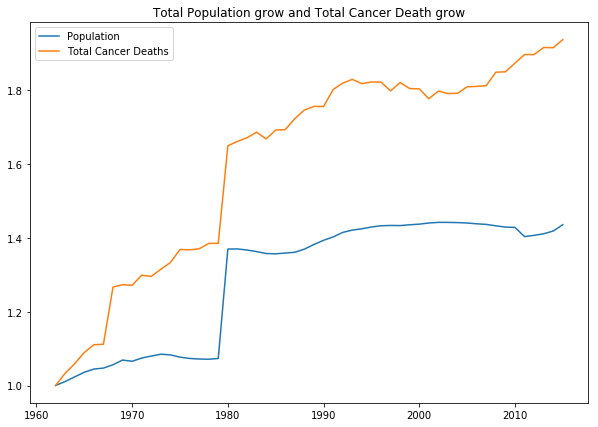

We see that total deaths by Cancer rise faster than the grow of the Population. 

A premature conclusion could be that Cancer becomes more deadlier or that more people get Cancer 

Notice the sharp rise at 1980, data before 1980 was only available for West Germany


In [27]:
# Populatin grow from 1962 - 2015
population_grow = df4["Insgesamt"].loc[:,"Insgesamt"] / df4["Insgesamt"].loc[:,"Insgesamt"].iloc[-1]
population_grow.plot(label="Population")

wholen.plot(label="Total Cancer Deaths")

plt.title("Total Population grow and Total Cancer Death grow")
plt.legend()
plt.show()

print("""We see that total deaths by Cancer rise faster than the grow of the Population. \n
A premature conclusion could be that Cancer becomes more deadlier or that more people get Cancer \n
Notice the sharp rise at 1980, data before 1980 was only available for West Germany""")

## Now we are going to plot this graph but for every agegroup we created

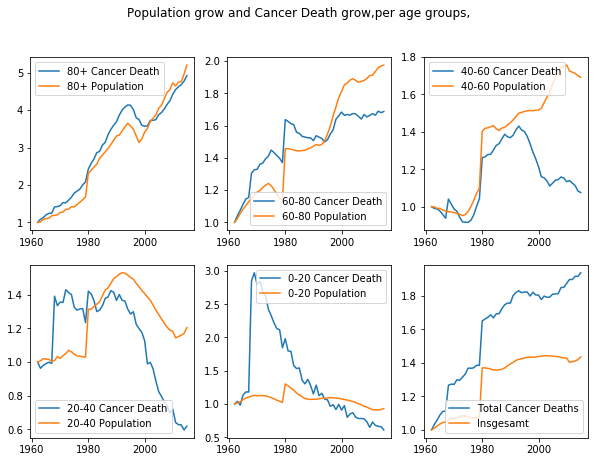

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=3)

# 80+ group
to_endn.plot(label="80+ Cancer Death",ax=axes[0,0])
(df4["80+ abs"] / df4["80+ abs"].iloc[-1]).plot(label="80+ Population",ax=axes[0,0])
axes[0,0].legend()

# 60-80
to80n.plot(label="60-80 Cancer Death",ax=axes[0,1])
(df4["60-80 abs"] / df4["60-80 abs"].iloc[-1]).plot(label="60-80 Population",ax=axes[0,1])
axes[0,1].legend()

# 40-60
to60n.plot(label="40-60 Cancer Death",ax=axes[0,2])
(df4["40-60 abs"] / df4["40-60 abs"].iloc[-1]).plot(label="40-60 Population",ax=axes[0,2])
axes[0,2].legend()

# 20-40
to40n.plot(label="20-40 Cancer Death",ax=axes[1,0])
(df4["20-40 abs"] / df4["20-40 abs"].iloc[-1]).plot(label="20-40 Population",ax=axes[1,0])
axes[1,0].legend()

# 0-20
to20n.plot(ax=axes[1,1],label="0-20 Cancer Death")
(df4["0-20 abs"] / df4["0-20 abs"].iloc[-1]).plot(label="0-20 Population",ax=axes[1,1])
axes[1,1].legend()

# All
wholen.plot(label="Total Cancer Deaths",ax=axes[1,2])
(df4["Insgesamt"] / df4["Insgesamt"].iloc[-1]).plot(label="Population",ax=axes[1,2])
axes[1,2].legend()

plt.suptitle("Population grow and Cancer Death grow,per age groups, ")

plt.show()

We see that for every agegroup(0-20,20-40,...) death by Cancer actually decrease <br>
in contrast to our first plot "Total Population grow and Total Cancer Death grow"

This is the exact definition of the Simpson Paradox : <br>
** The Simpson Paradoxon is a phenomenon in probability and statistics, <br>
in which a trend appears in several different groups of data <br>
but disappears or reverses when these groups are combined**
<br>
<br>
If we group our example data by age, the chance to die of cancer clearly decrease for all age-ranges. <br>
But when the groups are combined the trend reverses.
<br> 

## It is clearer in this Dataframe where the max values where higlighted

In [29]:
df5 = pd.DataFrame(columns=['1962','2015'], index=['0-20','20-40','40-60','60-80','80+','Total'])

df5.loc["0-20","1962"] = (to20 / df4["0-20 abs"] * 100).iloc[0]
df5.loc["0-20","2015"] = (to20 / df4["0-20 abs"] * 100).iloc[-1]

df5.loc["20-40","1962"] = (to40 / df4["20-40 abs"] * 100).iloc[0]
df5.loc["20-40","2015"] = (to40 / df4["20-40 abs"] * 100).iloc[-1]

df5.loc["40-60","1962"] = (to60 / df4["40-60 abs"] * 100).iloc[0]
df5.loc["40-60","2015"] = (to60 / df4["40-60 abs"] * 100).iloc[-1]

df5.loc["60-80","1962"] = (to80 / df4["60-80 abs"] * 100).iloc[0]
df5.loc["60-80","2015"] = (to80 / df4["60-80 abs"] * 100).iloc[-1]

df5.loc["80+","1962"] = (to_end / df4["80+ abs"] * 100).iloc[0]
df5.loc["80+","2015"] = (to_end / df4["80+ abs"] * 100).iloc[-1]

df5.loc["Total","1962"] = (whole / df4["Insgesamt"].loc[:,"Insgesamt"] * 100).iloc[0]
df5.loc["Total","2015"] = (whole / df4["Insgesamt"].loc[:,"Insgesamt"] * 100).iloc[-1]


df5["1962"] = round(df5["1962"].astype(float),4)
df5["2015"] = round(df5["2015"].astype(float),4)

df5 = df5.style.highlight_max(axis=1)

print("Percentage of Cancer Deaths per Agegroup:")

df5

Percentage of Cancer Deaths per Agegroup:


,1962,2015
0-20,0.0033,0.0021
20-40,0.0166,0.0085
40-60,0.1898,0.1207
60-80,0.7874,0.6727
80+,1.6704,1.5804
Total,0.2041,0.2754


### The explanation for this phenomenon is that different groups of our data have different impacts on the whole

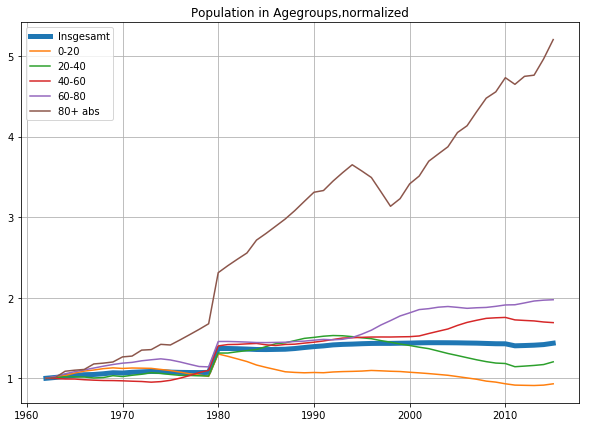

In [30]:
(df4["Insgesamt"] / df4["Insgesamt"].iloc[-1]).plot(linewidth=5)
(df4["0-20 abs"] / df4["0-20 abs"].iloc[-1]).plot(label="0-20")
(df4["20-40 abs"] / df4["20-40 abs"].iloc[-1]).plot(label="20-40")
(df4["40-60 abs"] / df4["40-60 abs"].iloc[-1]).plot(label="40-60")
(df4["60-80 abs"] / df4["60-80 abs"].iloc[-1]).plot(label="60-80")
(df4["80+ abs"] / df4["80+ abs"].iloc[-1]).plot(Label="80+")

plt.grid()
plt.title("Population in Agegroups,normalized")
plt.legend()
plt.show()

The population aged 80+ is 2015 five times larger than 1962 <br>
and they have the highest risk to die of cancer. <br>
The relative and absolute rise in cancer deaths in germany can be mostly explained by the **aging society**. <br>
